In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import nltk
#nltk.download()
#nltk.download('punkt')
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report




In [20]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Project3'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [29]:
dataset=pd.read_csv("../Project3/Resources/twitter_data.csv")
display(dataset.head())

,Sl no,Tweets,Search key,Feeling
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy moments,happy
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy moments,happy
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy moments,happy
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy moments,happy


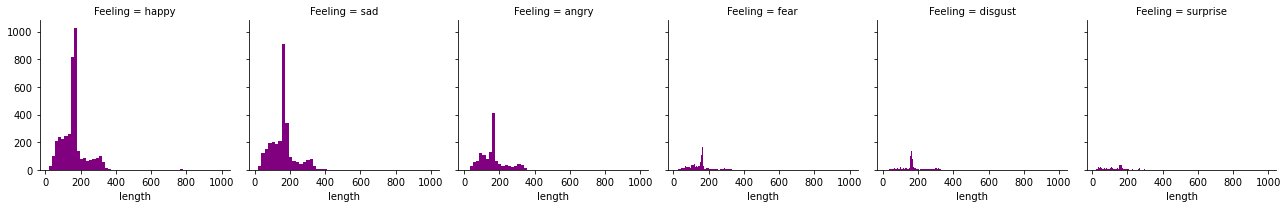

In [30]:
dataset.describe(include='all')
dataset['length'] = dataset['Tweets'].apply(len)
dataset.head()
graph = sns.FacetGrid(data=dataset,col='Feeling')
graph.map(plt.hist,'length',bins=50,color='Purple')

In [31]:
val = dataset.groupby('Feeling').mean()
val

,Sl no,length
Feeling,,
angry,4932.246085,165.794183
disgust,4262.874411,170.572998
fear,4122.549247,152.156431
happy,4560.091141,160.319501
sad,5739.734995,161.599158
surprise,7632.000000,136.441103


In [32]:
val.corr()

,Sl no,length
Sl no,1.000000,-0.742981
length,-0.742981,1.000000


In [33]:
dataset.Feeling.value_counts()

happy       3928
sad         2849
angry       1341
fear         863
disgust      637
surprise     399
Name: Feeling, dtype: int64

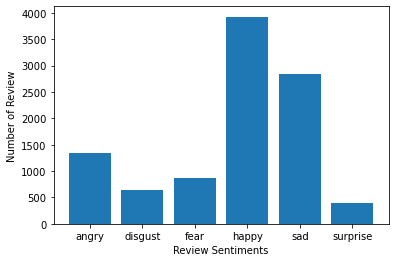

In [10]:
Sentiment_val=dataset.groupby('Feeling').count()
plt.bar(Sentiment_val.index.values, Sentiment_val['Tweets'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [11]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(dataset['Tweets'])
tf=TfidfVectorizer()
text_tf= tf.fit_transform(dataset['Tweets'])

In [12]:
x=text_tf
y=dataset['Feeling']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [13]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 348    0    2   32   13    0]
 [   0  181    1   14    2    0]
 [   1    0  212   30    5    2]
 [  23   11   29 1099   55    5]
 [  13    2    7   96  711    1]
 [   0    0    0   18    1   92]]


In [14]:
score = round(accuracy_score(y_test,preddt)*100,2)
print("Score:",score)

Score: 87.92


In [15]:
print("Classification Report:")
print(classification_report(y_test,preddt))

Classification Report:
              precision    recall  f1-score   support

       angry       0.90      0.88      0.89       395
     disgust       0.93      0.91      0.92       198
        fear       0.84      0.85      0.85       250
       happy       0.85      0.90      0.88      1222
         sad       0.90      0.86      0.88       830
    surprise       0.92      0.83      0.87       111

    accuracy                           0.88      3006
   macro avg       0.89      0.87      0.88      3006
weighted avg       0.88      0.88      0.88      3006

